In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model


In [2]:
def preprocess(array):
    # normaliza y corrige dimensiones
    array = array.astype("float32") / 255
    array = np.reshape(array, (len(array), 28, 28, 1))

    return array


In [3]:
def add_noise(array, factor=0.4):
    noisy_array = array + factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)

    return np.clip(noisy_array, 0.0, 1.0)

In [4]:
def display_random(array1, array2, n_img=10):
    indices = np.random.randint(len(array1), size=n_img)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n_img, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n_img, i + 1 + n_img)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

## preparacion de datos

11501568/11490434 [==============================] - 2s 0us/step


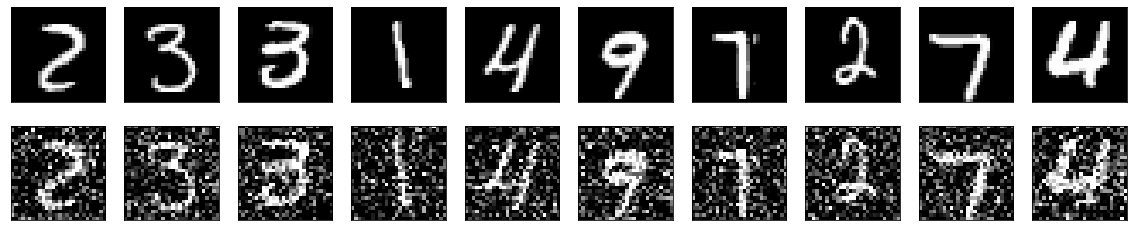

In [5]:
(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noisy_train_data = add_noise(train_data)
noisy_test_data = add_noise(test_data)

display_random(train_data, noisy_train_data)

## Autoencoder

In [6]:
input = layers.Input(shape=(28,28,1))

# encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# autoencoder model
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

2021-10-22 20:29:12.575127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 20:29:12.619129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 20:29:12.619648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 20:29:12.621606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 20:29:12.622127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

In [7]:
hist = autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

2021-10-22 20:29:15.103349: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-10-22 20:29:16.237214: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


469/469 [==============================] - 6s 5ms/step - loss: 0.1357 - val_loss: 0.0729
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0715 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0692 - val_loss: 0.0681
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0681 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0674 - val_loss: 0.0666
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0668 - val_loss: 0.0661
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0663 - val_loss: 0.0656
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0660 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0656 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0654 - val_loss: 0.0649
Epoch 11/5

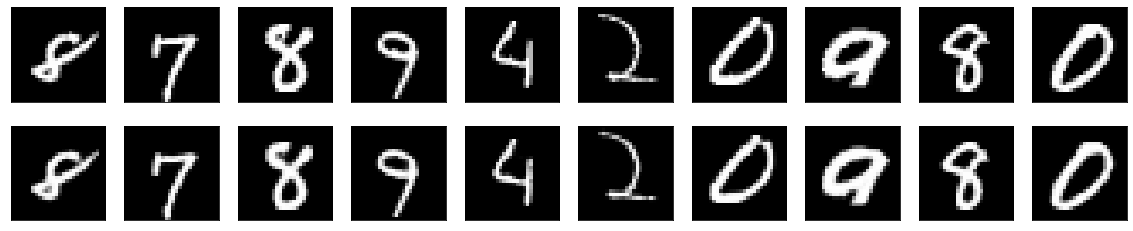

In [8]:
predictions = autoencoder.predict(test_data)
display_random(test_data, predictions)

### autoencoder para limpieza
Una vez comprobamos que el autoencoder funciona correctamente, podemos entrenar el mismo modelo con los datos con ruido en la entrada y los datos limpios en la salida

In [9]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1009 - val_loss: 0.0940
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0936 - val_loss: 0.0918
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0920 - val_loss: 0.0906
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0909 - val_loss: 0.0897
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - val_loss: 0.0891
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0896 - val_loss: 0.0887
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0891 - val_loss: 0.0884
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0888 - val_loss: 0.0879
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0885 - val_loss: 0.0877
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0882 - val_lo

469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0842
Epoch 82/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0843
Epoch 83/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0843
Epoch 84/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0842
Epoch 85/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0841
Epoch 86/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0845
Epoch 87/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - val_loss: 0.0841
Epoch 88/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0845 - val_loss: 0.0844
Epoch 89/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0844 - val_loss: 0.0841
Epoch 90/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0844 - val_loss: 

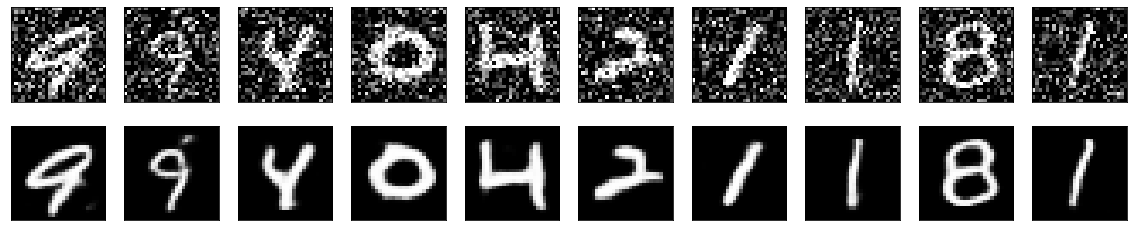

In [10]:
predictions = autoencoder.predict(noisy_test_data)
display_random(noisy_test_data, predictions)
